In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Dataset/student_clustering.csv')
print(f"Dataset Shape: {df.shape}")
df.head()

Dataset Shape: (200, 2)


,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [3]:
import matplotlib.pyplot as plt

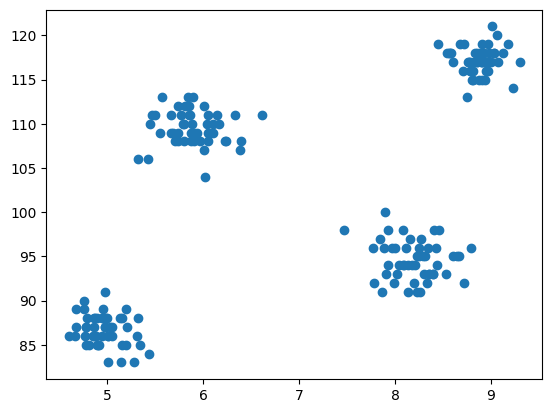

In [4]:
plt.scatter(df['cgpa'], df['iq'])

In [5]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init='auto')
    km.fit_predict(df)
    wcss.append(km.inertia_)
# .inertia_ gives: sum of squared distances of samples to their closest cluster center

In [8]:
wcss

[29957.898287999997,
 4184.14127,
 2503.397581,
 681.96966,
 523.7131894763966,
 520.4143637297974,
 352.8820608315008,
 265.28672663779747,
 202.06818704953463,
 191.22968441960325]

You can there are no abrupt changes after a point. Minimal Changes occur

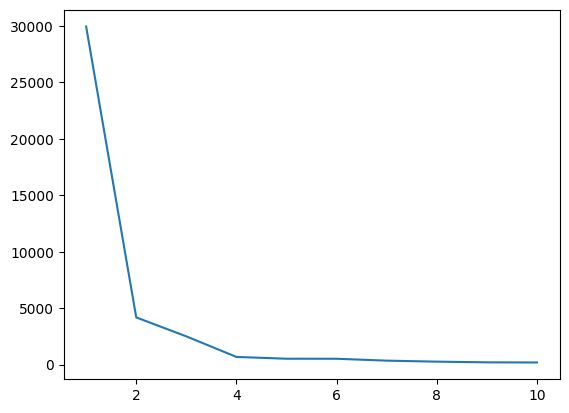

In [9]:
plt.plot(range(1, 11), wcss)

The graphs proves the above point. No abrupt/steep changes after a certain K value. This is the Elbow curve. That last point after which no changes occur is the elbow point. So K = 4 is the optimal number of clusters we should have

In [12]:
X = df.iloc[:, :].values
km = KMeans(n_clusters=4,n_init='auto')
y_means = km.fit_predict(X)  # clusters assigned to different data points

In [13]:
y_means

array([0, 1, 3, 3, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0, 1, 3, 1, 3, 1, 1, 3, 0,
       3, 0, 0, 3, 0, 2, 3, 1, 2, 1, 2, 1, 3, 3, 2, 1, 0, 1, 0, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 0, 2, 3, 2, 1, 1, 2, 1, 2, 1, 3, 3, 2, 0, 2,
       3, 0, 1, 3, 1, 2, 3, 0, 1, 2, 1, 2, 0, 3, 3, 2, 1, 0, 2, 0, 2, 1,
       2, 1, 2, 2, 3, 0, 3, 3, 2, 3, 0, 2, 1, 0, 0, 2, 0, 0, 3, 0, 2, 2,
       3, 2, 1, 1, 3, 2, 3, 1, 2, 0, 0, 1, 3, 2, 3, 0, 3, 1, 0, 3, 3, 1,
       0, 0, 1, 2, 1, 0, 3, 3, 3, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 2,
       0, 3, 1, 2, 1, 3, 0, 2, 1, 3, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 3,
       2, 1, 0, 2, 2, 1, 1, 1, 3, 0, 3, 3, 2, 1, 3, 3, 0, 0, 3, 0, 2, 1,
       1, 2])

In [15]:
X[y_means == 2]  # values who were assigned cluster 2

array([[  8.8 , 115.  ],
       [  9.18, 119.  ],
       [  8.86, 117.  ],
       [  8.83, 118.  ],
       [  8.56, 118.  ],
       [  8.96, 116.  ],
       [  8.78, 116.  ],
       [  8.45, 119.  ],
       [  8.79, 116.  ],
       [  8.81, 115.  ],
       [  8.88, 115.  ],
       [  9.07, 117.  ],
       [  8.92, 118.  ],
       [  8.75, 113.  ],
       [  8.71, 116.  ],
       [  8.86, 118.  ],
       [  9.3 , 117.  ],
       [  9.01, 121.  ],
       [  8.97, 116.  ],
       [  9.  , 117.  ],
       [  8.76, 117.  ],
       [  8.78, 117.  ],
       [  9.23, 114.  ],
       [  9.03, 118.  ],
       [  9.13, 118.  ],
       [  8.91, 119.  ],
       [  8.98, 118.  ],
       [  9.03, 118.  ],
       [  8.86, 117.  ],
       [  8.89, 118.  ],
       [  8.97, 117.  ],
       [  8.72, 119.  ],
       [  8.93, 118.  ],
       [  8.58, 118.  ],
       [  8.94, 117.  ],
       [  8.6 , 117.  ],
       [  8.77, 117.  ],
       [  8.81, 116.  ],
       [  8.54, 118.  ],
       [  8.97, 119.  ],


In [17]:
X[y_means == 2, 1]  # 'iq' column values of those who were assigned cluster 2
# 1st number = cluster number, 2nd number = column number

array([115., 119., 117., 118., 118., 116., 116., 119., 116., 115., 115.,
       117., 118., 113., 116., 118., 117., 121., 116., 117., 117., 117.,
       114., 118., 118., 119., 118., 118., 117., 118., 117., 119., 118.,
       118., 117., 117., 117., 116., 118., 119., 117., 119., 120., 117.,
       115., 115., 117., 116., 118., 117.])

Now let's plot the clusters in different colors.

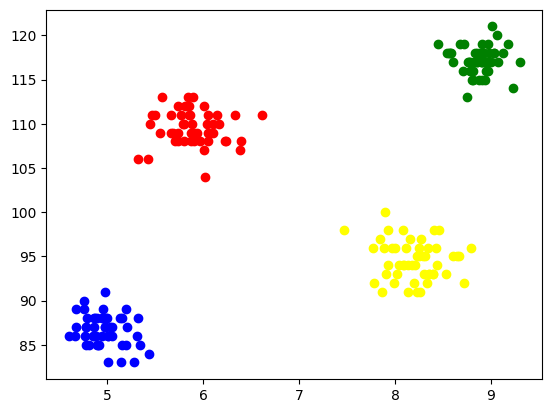

In [19]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], color='blue')
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], color='red')
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], color='green')
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], color='yellow')